# Econometria de Séries Temporais

## VAR: Decomposição de variância e Causalidade de Granger

João Ricardo Costa Filho \\
[joaocostafilho.com](https://)

**Motivação**: \\

 O que contribui para a variabilidade da taxa de inflação dos preços livres? Vamos utilizar um dos modelos de vetores autorregressivos do [box do Relatório de Inflação do BCB - jun/2004](https://www.bcb.gov.br/content/ri/relatorioinflacao/200406/RELINF200406-ri200406b8p.pdf) para responder essa pergunta em duas partes. Seguiremos com o mesmo modelo da aula passada, o VAR com dummies sazonais.

# Dados: taxas de inflação (preços livres e preços administrados), taxa de câmbio nominal, taxa de juros real

Faça o upload dos resultados produzidos com o notebook da primeira aula sobre VAR. Quando o arquivo estiver na máquina 'virtual' do Google, utilize a função load (lembre-se de ajustar o código abaixo com base no nome que você utilizou para salvar o arquivo):

In [ ]:
load("var.RData")

Warning message:
“namespace ‘vars’ is not available and has been replaced
by .GlobalEnv when processing object ‘var2’”


Para verificar se deu certo, faça o gráfico de uma das variáveis utilizadas no notebook da aula passada:

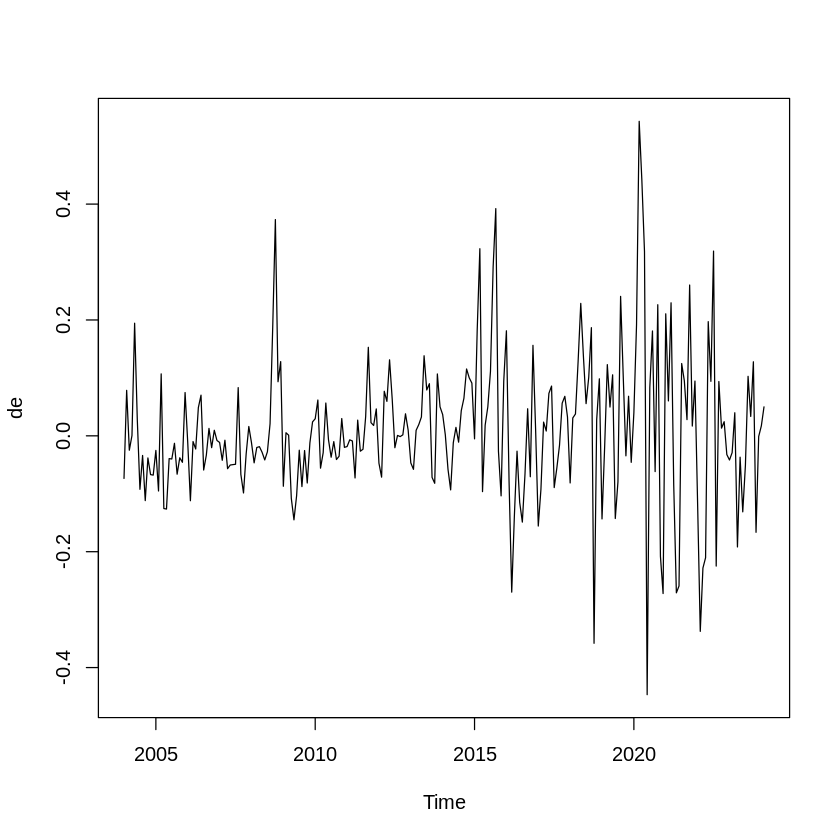

In [ ]:
plot( de )

# Decomposição de variância

In [ ]:
install.packages("vars", quiet = TRUE)

also installing the dependencies ‘zoo’, ‘strucchange’, ‘urca’, ‘lmtest’, ‘sandwich’




In [ ]:
library(vars)

Loading required package: MASS

Loading required package: strucchange

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: sandwich

Loading required package: urca

Loading required package: lmtest



Vamos analisar como as demais variáveis influenciam a variância dos erros de previsão da taxa de inflação mensal dos preços livres de acordo com o modelo estimado:

In [ ]:
fevd = fevd( var2, n.ahead = 12 )

In [ ]:
install.packages("stargazer", quiet = TRUE)

In [ ]:
library(stargazer)


Please cite as: 


 Hlavac, Marek (2022). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.3. https://CRAN.R-project.org/package=stargazer 




In [ ]:
stargazer::stargazer( fevd$liv, type = "text", style = "aer", title = "VAR(2)", column.labels = c( "Juros", "Câmbio", "Preços Adm.", "Preços Livres" ) )


VAR(2)
dreal  de    adm   liv 
-----------------------
0.014 0.014 0.000 0.972
0.022 0.011 0.006 0.960
0.062 0.011 0.007 0.920
0.088 0.010 0.007 0.894
0.105 0.010 0.008 0.877
0.115 0.010 0.009 0.866
0.121 0.010 0.010 0.859
0.125 0.010 0.011 0.855
0.127 0.010 0.011 0.852
0.128 0.010 0.012 0.850
0.129 0.010 0.012 0.849
0.130 0.010 0.012 0.849
-----------------------


# Causalidade de Granger

O Copom define a cada 45 dias a meta para a taxa de juros básica da economia, a taxa Selic. A sua implementação é feita por meio de operações de mercado aberto. Portanto, entende-se que, ao anunciar a meta, a entidade monetária tem por objetivo influenciar a taxa de juros efetiva. Mas será que ela consegue?

Vamos realizar um exercício inspirado no trabalho de John Taylor, publicado em 2001, intitulado [Expectations, Open Market Operations, and Changes in the Federal Funds Rate](https://files.stlouisfed.org/files/htdocs/publications/review/01/05/33-48Taylor.qxd.pdf).

Acesse [https://www.bcb.gov.br/](https://www.bcb.gov.br/) > Estatísticas > Séries Temporais (SGS) > Atividade econômica e encontre o código para (i) a meta da taxa de juros (Selic) definida pelo Copomo e (ii) a taxa de juros (Selic) anualizada, ambas em frequência diária. Utilize dados à partir de 1/1/2004.

In [ ]:
install.packages("rbcb", quiet = TRUE)

also installing the dependency ‘xts’




In [ ]:
library(rbcb)

In [ ]:
meta = get_series( 432, , start_date = '2004-01-01' )

In [ ]:
selic = get_series( 1178, start_date = '2004-01-01' )

Lembre-se que o teste de Causalidade de Granger pressupõem que as séries sejam estacionárias. Estime um VAR (cuja ordem deve ser escolhida pelo critério de informação Akaike) e faça o teste:

In [ ]:
dat <- merge( meta, selic , by = "date"); dat = dat[ , - 1]

In [ ]:
dat = data.frame( meta = diff( dat$`432`), selic = diff( dat$`1178`) )

In [ ]:
granger = VAR( dat, ic="AIC", type = "none")

In [ ]:
causality( granger, cause = c('meta'))

$Granger

	Granger causality H0: meta do not Granger-cause selic

data:  VAR object granger
F-Test = 19.928, df1 = 1, df2 = 10190, p-value = 8.129e-06


$Instant

	H0: No instantaneous causality between: meta and selic

data:  VAR object granger
Chi-squared = 2518.2, df = 1, p-value < 2.2e-16



In [ ]:
causality( granger, cause = c('selic') )

$Granger

	Granger causality H0: selic do not Granger-cause meta

data:  VAR object granger
F-Test = 0.49932, df1 = 1, df2 = 10190, p-value = 0.4798


$Instant

	H0: No instantaneous causality between: selic and meta

data:  VAR object granger
Chi-squared = 2518.2, df = 1, p-value < 2.2e-16



Qual é a sua conclusão? A meta da taxa de juros Granger-causa a taxa Selic efetiva?

R: